<a href="https://colab.research.google.com/github/roshanappa/AutoEncoder/blob/main/Anomaly_Detection_Of_ECG_using_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

mpl.rcParams['figure.figsize']=(10,8)
mpl.rcParams['axes.grid']=False

In [5]:
df = pd.read_csv('/content/ecg.csv',header=None)

In [6]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818287,-1.250522,-0.477492,-0.363808,-0.491957,-0.421855,-0.309201,-0.495939,-0.342119,-0.355336,-0.367913,-0.316503,-0.412374,-0.471672,-0.413458,-0.364617,-0.449298,-0.471419,-0.424777,-0.462517,-0.552472,-0.475375,-0.694200,-0.701868,-0.593812,-0.660684,-0.713831,-0.769807,-0.672282,-0.653676,-0.639406,-0.559302,-0.591670,...,1.258179,1.433789,1.700533,1.999043,2.125341,1.993291,1.932246,1.797437,1.522284,1.251168,0.998730,0.483722,0.023132,-0.194914,-0.220917,-0.243737,-0.254695,-0.291136,-0.256490,-0.227874,-0.322423,-0.289286,-0.318170,-0.363654,-0.393456,-0.266419,-0.256823,-0.288694,-0.162338,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,0.148951,0.183527,0.294876,0.190233,0.235575,0.253487,0.221742,0.050233,0.178042,0.139563,0.046794,0.043007,0.106544,0.012654,0.003995,0.045724,-0.045999,-0.072667,-0.071078,-0.153866,-0.227254,-0.249270,-0.253489,-0.332835,-0.264330,-0.345825,-0.310781,-0.334160,-0.306178,-0.174563,...,1.808428,2.164346,2.070747,1.903614,1.764455,1.507769,1.293428,0.894562,0.578016,0.244343,-0.286443,-0.515881,-0.732707,-0.832465,-0.803318,-0.836252,-0.777865,-0.774753,-0.733404,-0.721386,-0.832095,-0.711982,-0.751867,-0.757720,-0.853120,-0.766988,-0.688161,-0.519923,0.039406,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490658,-1.183580,-0.394229,-0.282897,-0.356926,-0.287297,-0.399489,-0.473244,-0.379048,-0.399039,-0.178594,-0.339522,-0.498447,-0.337251,-0.425480,-0.423952,-0.463170,-0.493253,-0.549749,-0.529831,-0.530935,-0.502365,-0.417368,-0.526346,-0.471005,-0.676784,-0.898612,-0.610571,-0.530164,-0.765674,-0.581937,-0.537848,-0.556386,...,1.810988,2.185398,2.262985,2.052920,1.890488,1.793033,1.564784,1.234619,0.900302,0.551957,0.258222,-0.128587,-0.092585,-0.168606,-0.495989,-0.395034,-0.328238,-0.448138,-0.268230,-0.456415,-0.357867,-0.317508,-0.434112,-0.549203,-0.324615,-0.268082,-0.220384,-0.117429,0.614059,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,-0.183319,-0.101657,-0.273874,-0.127818,-0.195983,-0.213523,-0.176473,-0.156932,-0.149172,-0.181510,-0.180074,-0.246151,-0.274260,-0.140960,-0.277449,-0.382549,-0.311937,-0.360093,-0.405968,-0.571433,-0.524106,-0.537886,-0.606778,-0.661446,-0.683375,-0.746683,-0.635662,-0.625231,-0.540094,-0.674995,...,1.772155,2.000769,1.925003,1.898426,1.720953,1.501711,1.422492,1.023225,0.776341,0.504426,0.056382,-0.233161,-0.406388,-0.327528,-0.460868,-0.402536,-0.345752,-0.354206,-0.439959,-0.425326,-0.439789,-0.451835,-0.395926,-0.448762,-0.391789,-0.376307,-0.461069,-0.253524,0.213006,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,-0.298107,-0.428928,-0.491351,-0.361304,-0.339296,-0.324952,-0.290113,-0.363051,-0.525684,-0.597423,-0.575523,-0.567503,-0.504555,-0.618406,-0.682814,-0.743849,-0.815588,-0.826902,-0.782374,-0.929462,-0.999672,-1.060969,-1.007877,-1.028735,-1.122629,-1.028650,-1.046515,-1.063372,-1.122423,-0.983242,...,1.155363,1.336254,1.627534,1.717594,1.696487,1.741686,1.674078,1.546928,1.331738,1.110168,0.922210,0.521777,0.154852,-0.123861,-0.202998,-0.247956,-0.219122,-0.214695,-0.319215,-0.198597,-0.151618,-0.129593,-0.074939,-0.

There are 140 columns and and 141 rows.The last column is indicating that the label which shows whether the ECG is normal or abnormal. It is a categorical variable with value eiteither 0 or 1.

In [7]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [8]:
df = df.add_prefix('c')

In [9]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [10]:
df['c140'].value_counts() #here 1 is the normal and 0 is abnormal.

1.0    2919
0.0    2079
Name: c140, dtype: int64

In [11]:
round(df.describe(),1)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c101,c102,c103,c104,c105,c106,c107,c108,c109,c110,c111,c112,c113,c114,c115,c116,c117,c118,c119,c120,c121,c122,c123,c124,c125,c126,c127,c128,c129,c130,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,...,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0,4998.0
mean,-0.3,-1.6,-2.5,-3.1,-3.2,-2.9,-2.3,-1.8,-1.4,-0.9,-0.6,-0.4,-0.3,-0.3,-0.2,-0.1,-0.1,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,...,1.1,1.1,1.2,1.2,1.2,1.2,1.1,1.0,0.9,0.7,0.6,0.4,0.3,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.1,0.1,0.1,-0.1,-0.3,-0.5,-0.8,-0.8,-0.6,-0.5,-0.7,0.6
std,1.2,1.4,1.4,1.3,1.1,0.9,0.7,0.6,0.6,0.7,0.6,0.5,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.5,0.5,0.5,...,0.6,0.6,0.6,0.6,0.6,0.6,0.5,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.8,0.9,1.2,1.4,1.6,1.9,2.1,2.1,2.1,1.9,1.8,1.4,0.5
min,-6.7,-7.1,-5.1,-5.4,-5.4,-5.3,-4.8,-4.3,-4.1,-4.1,-4.0,-3.7,-3.3,-3.2,-3.3,-3.2,-3.2,-3.1,-3.5,-4.1,-4.3,-4.1,-3.6,-3.8,-3.8,-3.7,-3.5,-3.6,-3.6,-3.5,-4.1,-4.1,-4.1,-3.6,-2.8,-3.6,-4.0,-3.9,-3.3,-3.9,...,-2.6,-2.6,-2.6,-2.4,-2.2,-2.4,-2.7,-2.9,-3.4,-3.5,-3.1,-2.6,-2.4,-2.7,-3.3,-3.2,-3.3,-3.5,-4.0,-4.2,-3.3,-3.1,-3.0,-3.1,-4.0,-4.8,-4.3,-3.8,-4.0,-4.0,-4.2,-4.6,-4.5,-4.6,-5.2,-4.9,-5.5,-5.9,-6.1,0.0
25%,-1.0,-2.7,-3.7,-4.2,-4.0,-3.5,-2.8,-2.2,-1.8,-1.4,-0.9,-0.7,-0.6,-0.5,-0.4,-0.3,-0.3,-0.3,-0.3,-0.4,-0.4,-0.4,-0.4,-0.4,-0.5,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.7,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.8,-0.7,...,0.6,0.7,0.7,0.7,0.7,0.7,0.7,0.7,0.6,0.5,0.3,0.0,-0.1,-0.2,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.4,-0.7,-1.1,-1.6,-2.1,-2.7,-3.0,-2.9,-2.2,-1.7,-1.6,0.0
50%,-0.3,-1.7,-2.6,-3.4,-3.5,-2.9,-2.3,-1.8,-1.4,-0.9,-0.5,-0.4,-0.4,-0.3,-0.2,-0.2,-0.1,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.3,-0.4,-0.4,-0.4,-0.4,-0.3,-0.3,...,0.9,1.0,1.2,1.2,1.3,1.2,1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.1,0.0,-0.0,-0.0,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,-0.1,0.0,0.2,0.5,0.7,0.7,0.6,0.3,-0.0,-0.2,-0.2,-0.2,-0.6,1.0
75%,0.5,-0.7,-1.5,-2.2,-2.5,-2.4,-1.8,-1.5,-1.1,-0.5,-0.2,-0.2,-0.2,-0.1,-0.0,0.1,0.2,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,...,1.5,1.7,1.8,1.8,1.7,1.6,1.4,1.2,1.1,0.9,0.9,0.8,0.8,0.7,0.6,0.6,0.6,0.5,0.5,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.2,0.3,0.7,1.1,1.2,1.2,1.3,1.2,1.0,0.9,1.0,1.0,0.3,1.0
max,5.0,3.5,2.7,1.9,2.1,1.6,1.9,1.8,1.7,1.9,2.0,2.2,2.4,2.4,2.2,2.1,2.6,2.1,2.1,2.1,2.1,2.1,2.0,2.0,2.0,2.0,1.9,2.0,1.9,1.9,1.9,2.1,1.9,1.9,1.9,1.8,1.7,1.6,1.6,1.6,...,2.8,2.8,2.9,2.7,3.0,2.9,2.6,2.5,2.5,2.6,2.9,3.0,2.8,2.9,2.8,2.7,2.5,2.7,2.8,2.8,2.7,2.9,3.1,3.1,3.2,3.2,3.1,3.2,3.0,3.0,3.0,2.9,2.9,2.9,3.4,3.4,3.6,4.4,7.4,1.0


In [12]:
x = df  #taken all data inside the x to see which is normal and abnormal
y = df['c140']

In [13]:
train_data,test_data,train_label,test_label = train_test_split(x,y,train_size=.80,random_state=42)

In [14]:
train_data.shape,test_data.shape

((3998, 141), (1000, 141))

In [15]:
train_label.shape,test_label.shape

((3998,), (1000,))

In [16]:
scaler = MinMaxScaler()
train_dataS_called = scaler.fit(train_data)

In [17]:
Train_data = scaler.fit_transform(train_data)
Test_data = scaler.fit_transform(test_data)

In [18]:
Train_data

array([[0.6198103 , 0.54933545, 0.32754152, ..., 0.70317822, 0.42847614,
        1.        ],
       [0.59365998, 0.62075353, 0.56918273, ..., 0.53575535, 0.47155381,
        0.        ],
       [0.43071076, 0.3571988 , 0.26708694, ..., 0.63800556, 0.45782433,
        1.        ],
       ...,
       [0.45442466, 0.35540716, 0.19809345, ..., 0.74294265, 0.50709418,
        1.        ],
       [0.40345124, 0.39132017, 0.33469886, ..., 0.50193227, 0.47770011,
        0.        ],
       [0.37134117, 0.25002207, 0.14599874, ..., 0.65626497, 0.35023474,
        1.        ]])

In [19]:
normal_trained_data = pd.DataFrame(Train_data).add_prefix('c').query('c140==1').values[:,:-1]
abnormal_trained_data = pd.DataFrame(Train_data).add_prefix('c').query('c140==0').values[:,:-1]

In [20]:
normal_tested_data = pd.DataFrame(Test_data).add_prefix('c').query('c140==1').values[:,:-1]
abnormal_tested_data = pd.DataFrame(Test_data).add_prefix('c').query('c140==0').values[:,:-1]

In [21]:
normal_trained_data.shape,normal_tested_data.shape

((2328, 140), (591, 140))

In [22]:
abnormal_trained_data.shape,abnormal_tested_data.shape

((1670, 140), (409, 140))

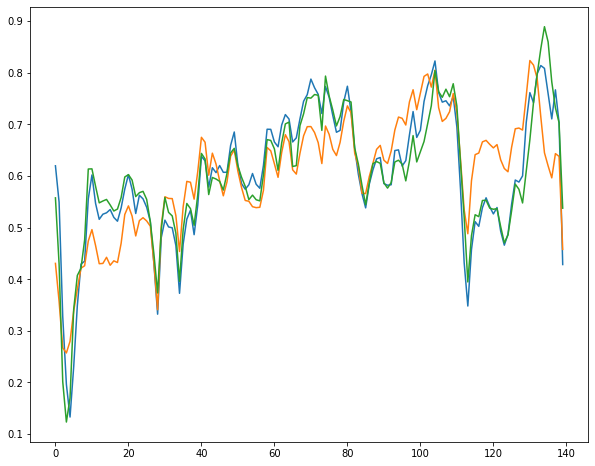

In [23]:
plt.plot(normal_trained_data[0])
plt.plot(normal_trained_data[1])
plt.plot(normal_trained_data[2])

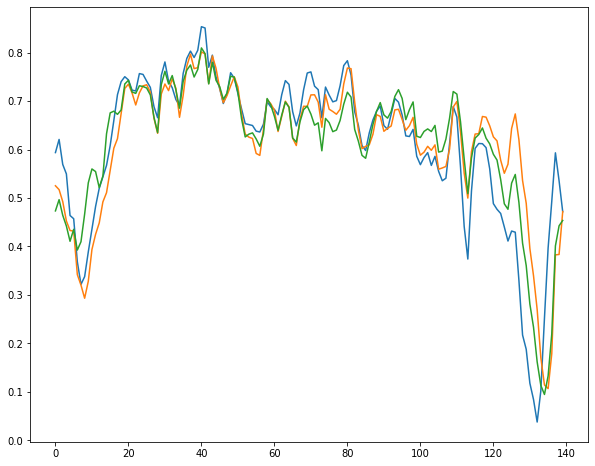

In [24]:
plt.plot(abnormal_trained_data[0])
plt.plot(abnormal_trained_data[1])
plt.plot(abnormal_trained_data[2])

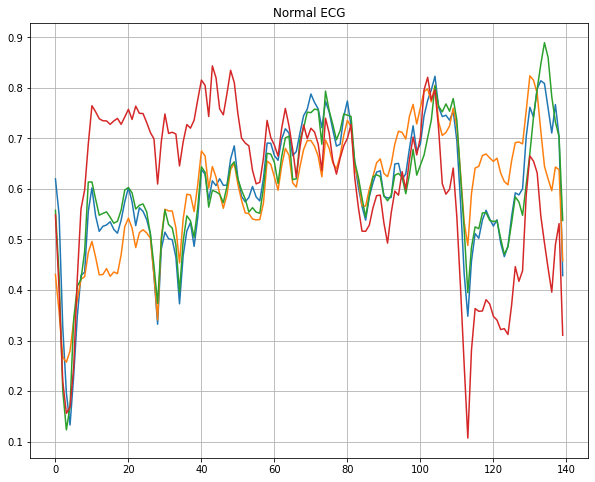

In [28]:
#Lets plot a normal ECG
plt.plot(np.arange(140), normal_trained_data[0])
plt.plot(np.arange(140), normal_trained_data[1])
plt.plot(np.arange(140), normal_trained_data[2])
plt.plot(np.arange(140), normal_trained_data[3])
plt.grid()
plt.title('Normal ECG')
plt.show()

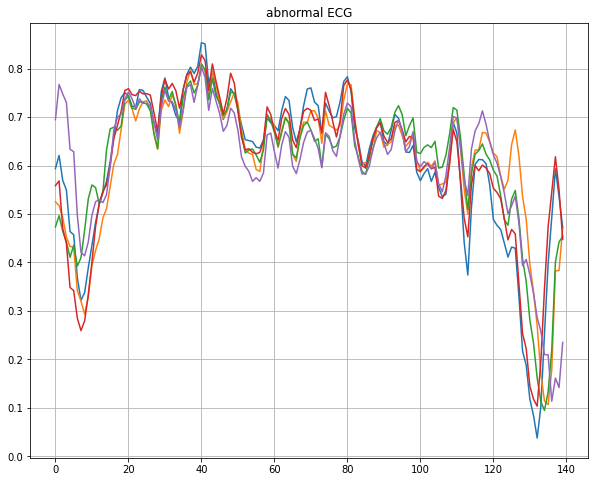

In [30]:
#Lets plot a normal ECG
plt.plot(np.arange(140), abnormal_trained_data[0])
plt.plot(np.arange(140), abnormal_trained_data[1])
plt.plot(np.arange(140), abnormal_trained_data[2])
plt.plot(np.arange(140), abnormal_trained_data[3])
plt.plot(np.arange(140), abnormal_trained_data[4])
plt.grid()
plt.title('abnormal ECG')
plt.show()

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(8,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

This model uses an Autoencoder architecture for anomaly detection

Autoencoders are a specific type of feedforward neural network.It compresess the input into a so-called "code" of lower dimensionality and then tries to reconstruct the output from this code.It is an unsupervised learning model.

It consists of two parts:- 1.Encoder 2.Decoder

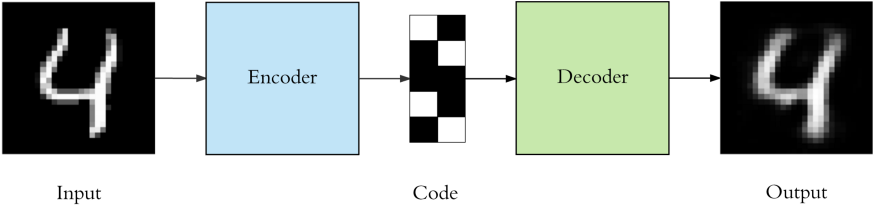

So in simple terms we provide an input to the autoencoder and it tries to re-create it.

For a detailed information refer to the article in link https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798

So how the model will detect anomaly ?

We will create an encoder and a decoder using an ANN architecture.We are going to provide the ECG data as input and the model will try to reconstruct it. The error between the original data and reconstructed output will be called the reconstruction error.Based on this recostruction error we are going to classify an ECG as anomalous or not.In order to do this we are going to train the model only on the normal ECG data but it will be tested on the full test set, so that when an abnormal ECG is provided in the input the autoencoder will try to reconstruct it but since it has been only trained on normal ECG data the output will have a larger reconstruction error. We will also define a minimum threshold for the error i.e. if the reconstruction error is above the threshold then it will be categorised as anomalous.

Before we make the model another thing that I want to clarify is that I will be using the Subclassing API of keras for making the model. In keras there are mainly 3 APIs for defining a model :- **1.Sequential API 2.Functional API 3.Subclassing API

The reason I used Subclassing API is that it provides a good control over the model as compared to Sequential API because in sequential API the add funcion implicitly passes the output of one layer into the next and u just get the output from the final layer but in case of subclassing API the forward pass is explicitly defined as you can see in the call() function. For this problem this api suits best.

The subclassing api is used to create a model class called detector(in this case) it inherits from the Model class of keras from which both sequential model and functional api also inherit. First using super() we pass the parameters to the parent class then we define out constructor which has the encoder and decoder. Then we implement the forward pass in the call() function.

For a better understanding refer to this article https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3

In [36]:
#Now let's define the model!
#Here I have used the Model Subclassing API (but we can also use the Sequential API)
#The model has 2 parts : 1. Encoder and 2. Decoder
 
class detector(Model):
  def __init__(self):
    super(detector, self).__init__()
    self.encoder = tf.keras.Sequential([
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dense(8, activation='relu')
    ])
    self.decoder = tf.keras.Sequential([
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dense(32, activation='relu'),
                                        tf.keras.layers.Dense(140, activation='sigmoid')
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [39]:
autoencoder = detector()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')
autoencoder.compile(optimizer='adam', loss='mae')
autoencoder.fit(normal_trained_data,normal_trained_data, epochs = 50, batch_size=128, validation_data=(Train_data[:,:-1],Train_data[:,:-1]),callbacks=[early_stopping])

Epoch 1/50
19/19 [==============================] - 1s 15ms/step - loss: 0.1315 - val_loss: 0.1232
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0982 - val_loss: 0.0950
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0648 - val_loss: 0.0794
Epoch 4/50
19/19 [==============================] - 0s 6ms/step - loss: 0.0509 - val_loss: 0.0751
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0467 - val_loss: 0.0741
Epoch 6/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0458 - val_loss: 0.0741
Epoch 7/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0454 - val_loss: 0.0739
Epoch 8/50
19/19 [==============================] - 0s 7ms/step - loss: 0.0452 - val_loss: 0.0733
Epoch 9/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0450 - val_loss: 0.0728
Epoch 10/50
19/19 [==============================] - 0s 5ms/step - loss: 0.0447 - val_loss: 0.0723
Epoch 11/50
19/19 

In [43]:
encoder_out = autoencoder.encoder(normal_tested_data).numpy()
decoder_out = autoencoder.decoder(encoder_out).numpy()

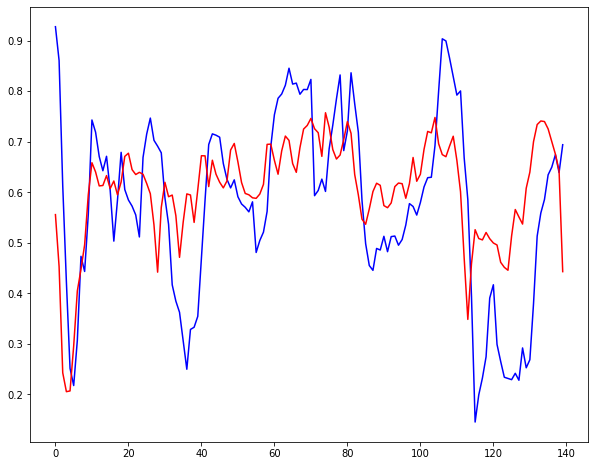

In [44]:
plt.plot(normal_tested_data[0],color='b')
plt.plot(decoder_out[0],color='r')

In [45]:
encoder_out_a = autoencoder.encoder(abnormal_tested_data).numpy()
decoder_out_a = autoencoder.decoder(encoder_out_a).numpy()

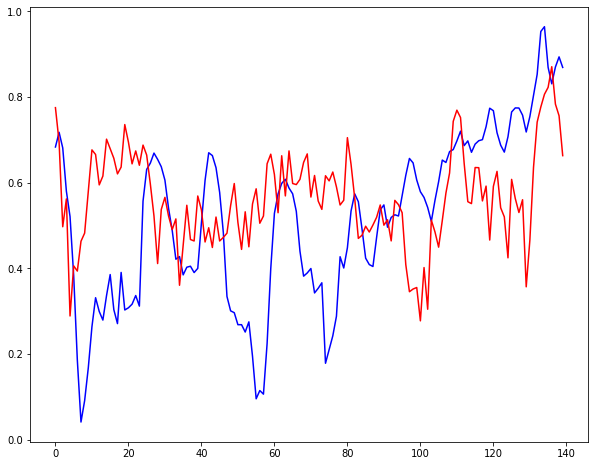

In [46]:
plt.plot(abnormal_tested_data[0],color='b')
plt.plot(decoder_out_a[0],color='r')

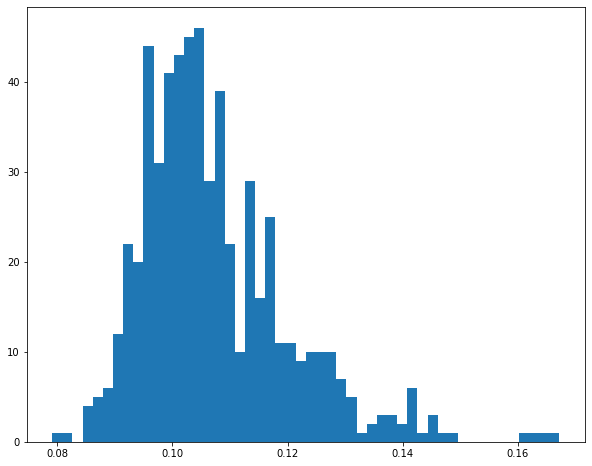

In [48]:
reconstructions = autoencoder.predict(normal_tested_data)
train_loss = tf.keras.losses.mae(reconstructions,normal_tested_data)
plt.hist(train_loss,bins=50)
plt.show()

Most of the data lays inbetween the 0.09 to 0.13 sor in order to get the anomaly we need to set the threshold.

In [49]:
np.mean(train_loss)

0.10736654553786742

In [51]:
np.std(train_loss)

0.012895308112486696

As per the business scinario we need to set the threshold.

In [72]:
threshold = np.mean(train_loss) + 0.5*np.std(train_loss)

In [73]:
threshold

0.11381419959411078

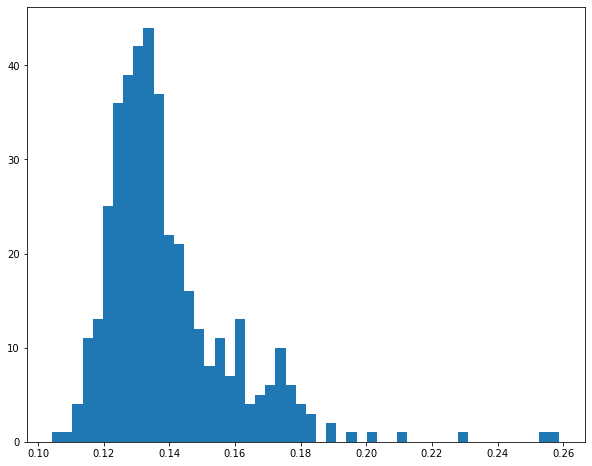

In [74]:
reconstructions_a = autoencoder.predict(abnormal_tested_data)
train_loss_a = tf.keras.losses.mae(reconstructions_a,abnormal_tested_data)
plt.hist(train_loss_a,bins=50)
plt.show()

Here,we can see the abonormal data error is laying inbetween the 0.12 and 0.16 so the training and testing error are completly seperable.

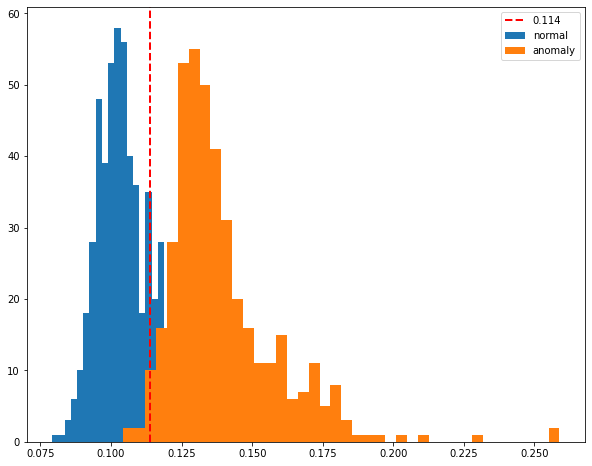

In [75]:
plt.hist(train_loss,bins=40,label='normal')
plt.hist(train_loss_a,bins=40,label='anomaly')
plt.axvline(threshold,color='r',linewidth=2,linestyle='dashed',label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [76]:
np.mean(train_loss_a)

0.13949639739852068

In [77]:
np.std(train_loss_a)

0.01959041624131886

## For the Normal Classes

In [78]:
tf.math.less(train_loss,threshold)

<tf.Tensor: shape=(591,), dtype=bool, numpy=
array([False,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  Tr

In [79]:
preds = tf.math.less(train_loss,threshold) #This is our actual that are less than the threshould

In [80]:
tf.math.count_nonzero(preds) #predicted correctly 442

<tf.Tensor: shape=(), dtype=int64, numpy=442>

In [81]:
preds.shape

TensorShape([591])

Out of 591 algorithm detect the 442 as normal.

## For the anomaly classes

In [82]:
preds_a = tf.math.greater(train_loss_a,threshold)

In [83]:
tf.math.count_nonzero(preds_a)

<tf.Tensor: shape=(), dtype=int64, numpy=402>

In [84]:
preds_a.shape

TensorShape([409])

Out of 402 and algorithm detect the 409 as anomaly.

In [89]:
#Now let's define a function in order to plot the original ECG and reconstructed ones and also show the error
def plot(data, n):
  encoder_out= autoencoder.encoder(data).numpy()
  decoder_out = autoencoder.decoder(encoder_out).numpy()
  plt.plot(data[n], 'b')
  plt.plot(decoder_out[n], 'r')
  plt.fill_between(np.arange(140), data[n], decoder_out[n], color = 'lightcoral')
  plt.legend(labels=['Input', 'Reconstruction', 'Error'])
  plt.show()

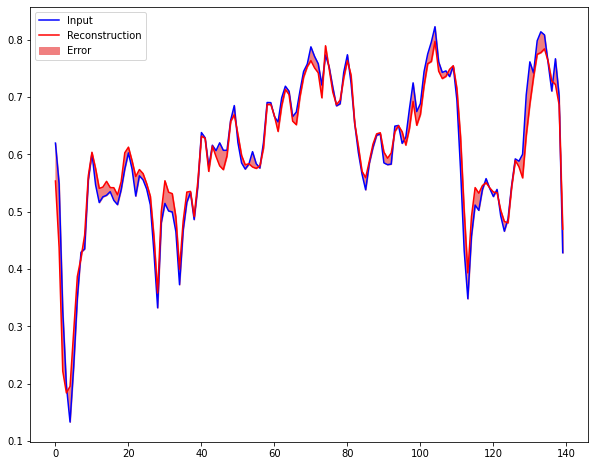

In [90]:
plot(normal_trained_data,0)

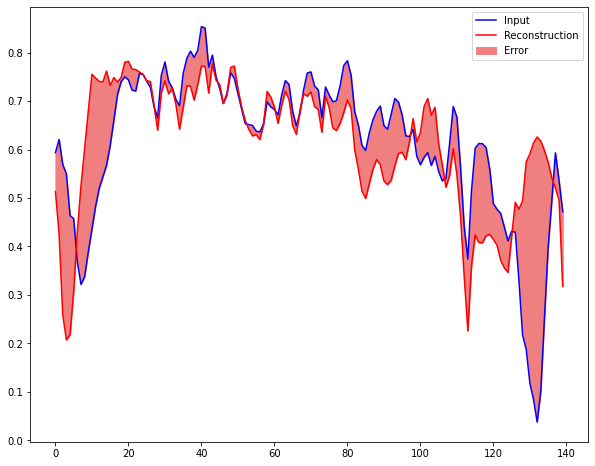

In [91]:
plot(abnormal_trained_data,0)

As per the business requirement we have to change the our threshould value.

## Thank You !!